# Proyecto

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = np.load('proyecto_training_data.npy')
training_data_percent = 80
test_data_percent = 100-training_data_percent
training_data_samples = int(data.shape[0] * (training_data_percent*0.01))
random_indexes = np.random.choice(data.shape[0], size=training_data_samples, replace=False)
training_data = data[random_indexes,:]
test_data = np.delete(data,random_indexes,axis=0)

In [6]:
df = pd.DataFrame(training_data, columns = ['SalePrice','OverallQuality','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [7]:
df.describe()

,SalePrice,OverallQuality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,960.000000
mean,180922.451199,6.104452,1163.368151,6.494863,1971.438356,69.959375
std,78084.713502,1.373409,388.071511,1.587216,30.200693,24.933392
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,130000.000000,5.000000,878.500000,5.000000,1954.000000,59.000000
50%,164000.000000,6.000000,1088.000000,6.000000,1972.000000,69.000000
75%,213625.000000,7.000000,1412.500000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,4692.000000,12.000000,2010.000000,313.000000


In [8]:
sale_price = df['SalePrice']
overall_qlt = df['OverallQuality']
fl_sqft = df['1stFlrSF']
rooms_above_grade = df['TotRmsAbvGrd']
year_built = df['YearBuilt']
linear_ftstreet = df['LotFrontage']
#sale_price_sorted = sale_price.sort_values(ascending=True)
#sale_price_sorted

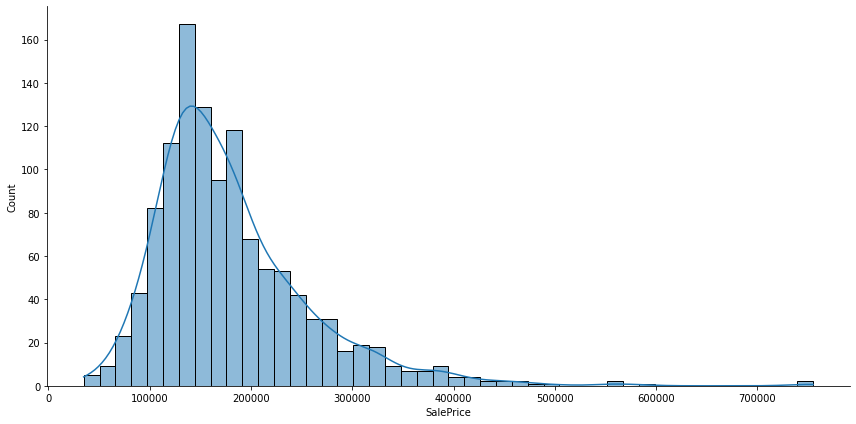

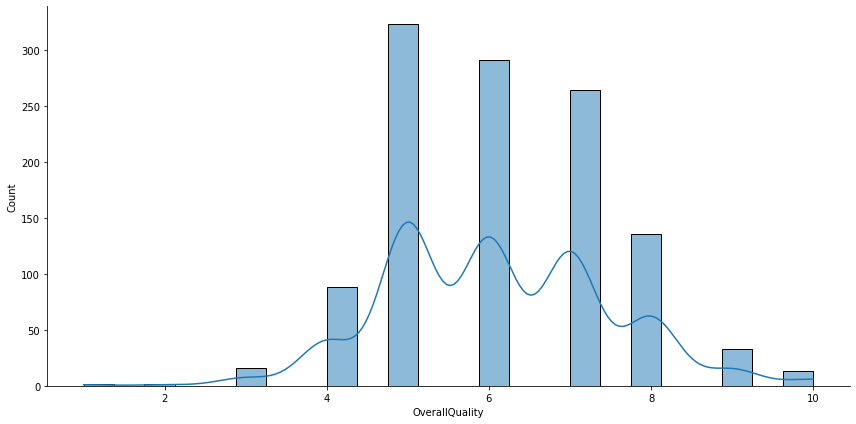

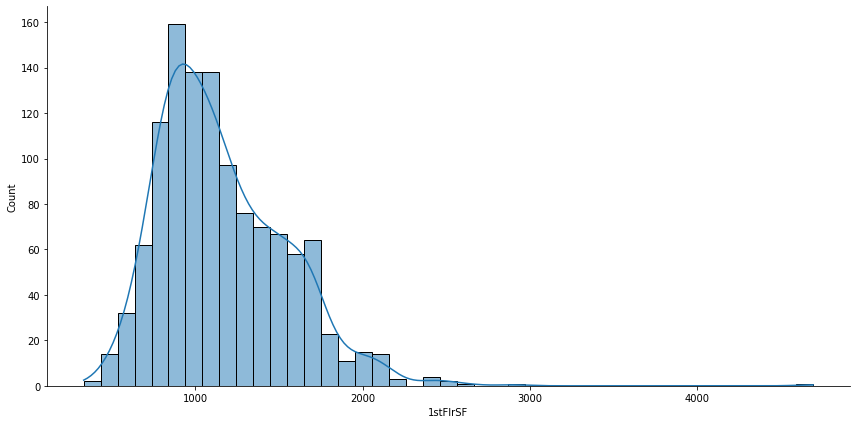

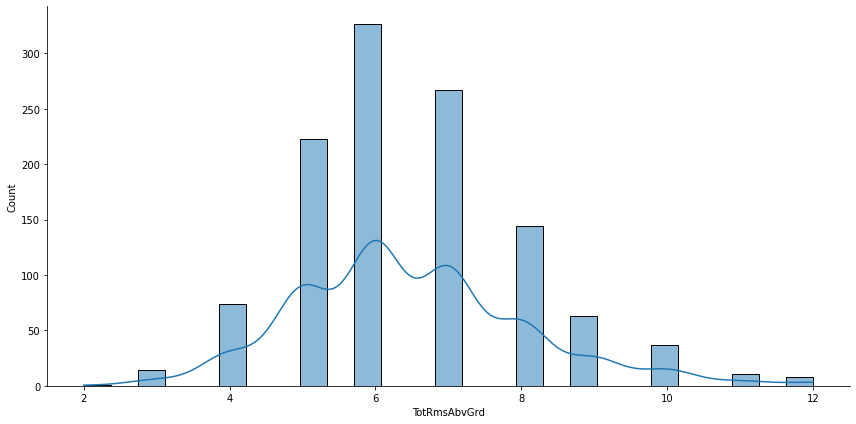

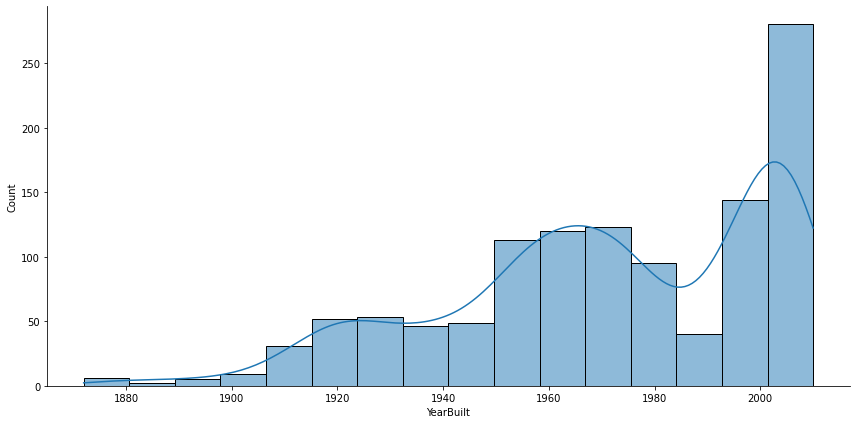

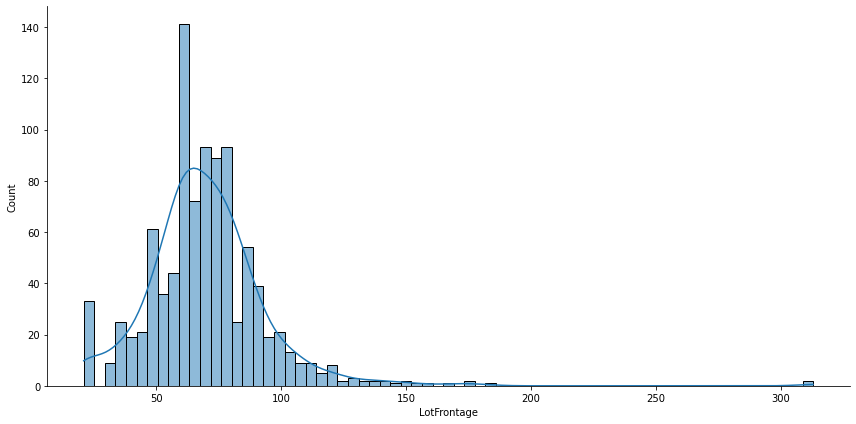

In [9]:
sns.displot(df['SalePrice'], kde=True,height=6, aspect=2,)
sns.displot(df['OverallQuality'], kde=True,height=6, aspect=2,)
sns.displot(df['1stFlrSF'], kde=True,height=6, aspect=2,)
sns.displot(df['TotRmsAbvGrd'], kde=True,height=6, aspect=2,)
sns.displot(df['YearBuilt'], kde=True,height=6, aspect=2,)
sns.displot(df['LotFrontage'], kde=True,height=6, aspect=2,)

In [70]:
corr_p_oq = df['SalePrice'].corr(df['OverallQuality'])
corr_p_oq

0.7938096335444471

In [71]:
corr_p_sf = df['SalePrice'].corr(df['1stFlrSF'])
corr_p_sf

0.6065184726761106

In [72]:
corr_p_rooms = df['SalePrice'].corr(df['TotRmsAbvGrd'])
corr_p_rooms

0.5251654959301956

In [73]:
corr_p_yearb = df['SalePrice'].corr(df['YearBuilt'])
corr_p_yearb

0.5130285892894982

In [74]:
corr_p_lfst = df['SalePrice'].corr(df['LotFrontage'])
corr_p_lfst

0.36129947302295157

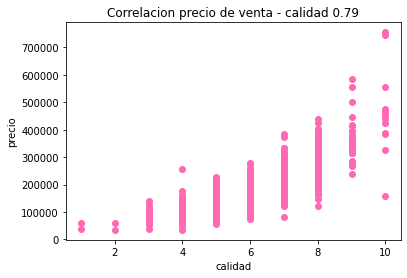

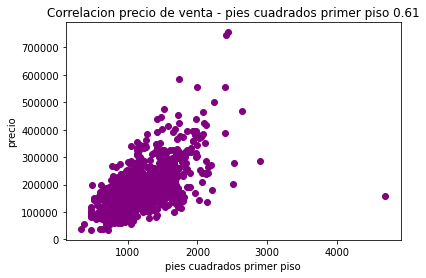

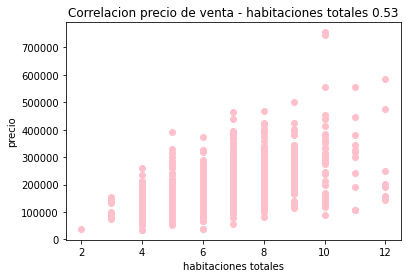

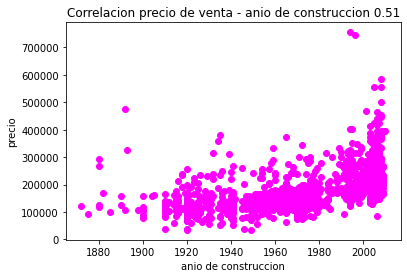

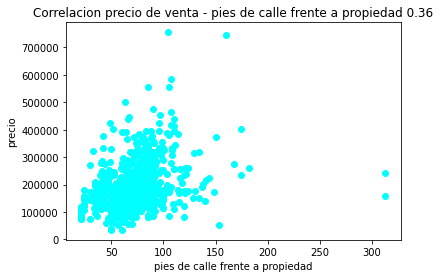

In [78]:
plt.scatter(df['OverallQuality'], df['SalePrice'], color = 'hotpink')
plt.title("Correlacion precio de venta - calidad " + str("%.2f" % corr_p_oq))
plt.xlabel("calidad")
plt.ylabel("precio")
plt.show()
plt.scatter(df['1stFlrSF'], df['SalePrice'], color = 'purple')
plt.title("Correlacion precio de venta - pies cuadrados primer piso " + str("%.2f" % corr_p_sf))
plt.xlabel("pies cuadrados primer piso")
plt.ylabel("precio")
plt.show()
plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'], color = 'pink')
plt.title("Correlacion precio de venta - habitaciones totales " + str("%.2f" % corr_p_rooms))
plt.xlabel("habitaciones totales")
plt.ylabel("precio")
plt.show()
plt.scatter(df['YearBuilt'], df['SalePrice'], color = 'magenta')
plt.title("Correlacion precio de venta - anio de construccion " + str("%.2f" % corr_p_yearb))
plt.xlabel("anio de construccion")
plt.ylabel("precio")
plt.show()
plt.scatter(df['LotFrontage'], df['SalePrice'], color = 'cyan')
plt.title("Correlacion precio de venta - pies de calle frente a propiedad " + str("%.2f" % corr_p_lfst))
plt.xlabel("pies de calle frente a propiedad")
plt.ylabel("precio")
plt.show()